In [1]:
import pandas as pd
from sklearn.utils import shuffle


df = pd.read_csv("Dataset/breast+normal.csv")
df = shuffle(df, random_state=42).reset_index(drop=True)

display(df.head(5))

,cancer_type,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,breast,HER,10.263647,7.475040,6.596640,7.040582,2.941240,7.314004,4.971653,4.546678,...,12.185275,11.790653,13.759799,13.517987,6.483418,4.960639,4.946883,2.882284,3.483840,3.294246
1,breast,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
2,breast,tumoral_basal,9.791921,7.837218,6.763571,8.027516,3.502067,6.323608,5.644005,4.767065,...,12.138991,11.553036,13.941295,13.803380,4.179780,3.890175,3.349415,3.493575,3.673327,3.859385
3,breast,tumoral,10.801614,5.512038,4.911711,6.627577,2.464373,5.861197,7.117165,3.429159,...,12.706791,12.380825,13.804549,13.629897,8.771508,4.767376,6.523479,2.324532,2.762783,2.823430
4,normal,normal,11.909146,7.652584,8.477199,10.087820,5.190000,8.729161,6.363098,6.985240,...,13.509011,13.119898,14.357566,14.210945,5.709682,5.630785,4.634996,4.571160,4.910928,5.053469


In [2]:
def preprocessing(df):
    
    # Drop type Columns
    if "type" in df.columns:
        df = df.drop(columns="type")

    # Convert label to binary type:
    if 'cancer_type' in df.columns and not df['cancer_type'].isin([0, 1]).all():
        df['cancer_type'] = df['cancer_type'].map({'breast': 1, 'normal': 0})
    
    # Get X,y
    target = 'cancer_type'
    X = df.drop(columns=target)
    y = df[target]
    
    return X,y 

X,y = preprocessing(df)
display(X.head(5))
display(y.head(5))

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,10.263647,7.475040,6.596640,7.040582,2.941240,7.314004,4.971653,4.546678,8.969669,3.433990,...,12.185275,11.790653,13.759799,13.517987,6.483418,4.960639,4.946883,2.882284,3.483840,3.294246
1,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,9.022345,3.312473,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
2,9.791921,7.837218,6.763571,8.027516,3.502067,6.323608,5.644005,4.767065,6.547820,3.571121,...,12.138991,11.553036,13.941295,13.803380,4.179780,3.890175,3.349415,3.493575,3.673327,3.859385
3,10.801614,5.512038,4.911711,6.627577,2.464373,5.861197,7.117165,3.429159,3.675453,3.406656,...,12.706791,12.380825,13.804549,13.629897,8.771508,4.767376,6.523479,2.324532,2.762783,2.823430
4,11.909146,7.652584,8.477199,10.087820,5.190000,8.729161,6.363098,6.985240,8.151338,7.106355,...,13.509011,13.119898,14.357566,14.210945,5.709682,5.630785,4.634996,4.571160,4.910928,5.053469


0    1
1    1
2    1
3    1
4    0
Name: cancer_type, dtype: int64

In [3]:
# Method 1: Variance Threshold (Assume Features with higher variance => better)
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

threshold = 0.001
selector = VarianceThreshold(threshold=threshold)
X_var = selector.fit_transform(X)

selected_feature_indices = selector.get_support(indices=True)
X_var = X.columns[selected_feature_indices]
print(f"Number of selected features: {len(X_var)}")
print(f"Selected features: {X_var}")

Number of selected features: 54675
Selected features: Index(['1007_s_at', '1053_at', '117_at', '121_at', '1255_g_at', '1294_at',
       '1316_at', '1320_at', '1405_i_at', '1431_at',
       ...
       'AFFX-r2-Ec-bioD-3_at', 'AFFX-r2-Ec-bioD-5_at', 'AFFX-r2-P1-cre-3_at',
       'AFFX-r2-P1-cre-5_at', 'AFFX-ThrX-3_at', 'AFFX-ThrX-5_at',
       'AFFX-ThrX-M_at', 'AFFX-TrpnX-3_at', 'AFFX-TrpnX-5_at',
       'AFFX-TrpnX-M_at'],
      dtype='object', length=54675)


In [4]:
# Method 2: Unvariate feature selection method (Based on their relation with output)
# ANOVA f-statistics

from sklearn.feature_selection import SelectKBest, f_classif

# Select top 1000 features based on ANOVA F-statistic
k_best_selector = SelectKBest(score_func=f_classif, k=500)
X_anova = k_best_selector.fit_transform(X, y)

# Get selected feature names
X_anova = X.columns[k_best_selector.get_support()]

print(f"Selected features: {X_anova}")

Selected features: Index(['1552790_a_at', '1553243_at', '1554485_s_at', '1554547_at',
       '1555241_at', '1555243_x_at', '1558662_s_at', '1559000_at',
       '1559067_a_at', '1559949_at',
       ...
       '244730_x_at', '244779_at', '244880_at', '32625_at', '36829_at',
       '37892_at', '38037_at', '45288_at', '48031_r_at', '53991_at'],
      dtype='object', length=500)


In [5]:
# Method 3: Mutual Information methnod (Non-linear relationship between predictors and targets)

from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Select top 100 features based on Mutual Information
mutual_info_selector = SelectKBest(score_func=mutual_info_classif, k=500)
X_mut = mutual_info_selector.fit_transform(X, y) 

# Get selected feature names
X_mut = X.columns[mutual_info_selector.get_support()]

print(f"Selected features: {X_mut}")


Selected features: Index(['1552281_at', '1553243_at', '1554485_s_at', '1554712_a_at',
       '1554943_at', '1554945_x_at', '1555236_a_at', '1556165_at',
       '1556533_at', '1556737_at',
       ...
       '32625_at', '36742_at', '36829_at', '37892_at', '38037_at',
       '38691_s_at', '40284_at', '45288_at', '48031_r_at', '53991_at'],
      dtype='object', length=500)


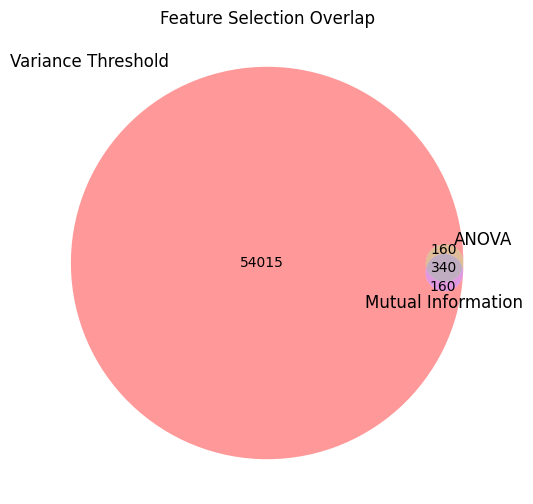

In [6]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3  

# Convert numpy arrays to flattened lists for compatibility
variance_features = set(X_var.ravel())
anova_features = set(X_anova.ravel())
mutual_info_features = set(X_mut.ravel())

# Create a Venn diagram to visualize the overlap
plt.figure(figsize=(8, 6))
venn_diagram = venn3(
    subsets=(
        len(variance_features - anova_features - mutual_info_features),  # Only Variance
        len(anova_features - variance_features - mutual_info_features),  # Only ANOVA
        len(variance_features & anova_features - mutual_info_features),  # Variance & ANOVA
        len(mutual_info_features - variance_features - anova_features),  # Only Mutual Info
        len(variance_features & mutual_info_features - anova_features),  # Variance & Mutual Info
        len(anova_features & mutual_info_features - variance_features),  # ANOVA & Mutual Info
        len(variance_features & anova_features & mutual_info_features),  # All 3 Methods
    ),
    set_labels=("Variance Threshold", "ANOVA", "Mutual Information"),
)
plt.title("Feature Selection Overlap")
plt.show()


In [8]:
combined_features = set(X_anova).union(set(X_mut))  # Combine both feature sets
X_reduce = X[list(combined_features)]  # Subset the data to include combined features

X = X_reduce

In [9]:
# Model train: Logistic Regression, L1 Regularization, 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, classification_report
import numpy as np

# Define Training Pipeline
pipeline = Pipeline([
    ('classifier', LogisticRegression(penalty='l1', solver='saga', max_iter=10000, random_state=42))
])

# Define Stratified K-Fold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store results
accuracy_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Perform K-Fold Cross-Validation
fold = 1
for train_index, test_index in skf.split(X, y):
    # Split the data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the pipeline
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    # Append scores
    accuracy_scores.append(accuracy)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    
    fold += 1

In [10]:
# Final Train accuracy

# Print average metrics across folds
print("\nCross-Validation Results:")
print(f"Mean Accuracy: {np.mean(accuracy_scores):.2f} ± {np.std(accuracy_scores):.2f}")
print(f"Mean Recall: {np.mean(recall_scores):.2f} ± {np.std(recall_scores):.2f}")
print(f"Mean F1 Score: {np.mean(f1_scores):.2f} ± {np.std(f1_scores):.2f}")
print(f"Mean ROC-AUC: {np.mean(roc_auc_scores):.2f} ± {np.std(roc_auc_scores):.2f}")


Cross-Validation Results:
Mean Accuracy: 1.00 ± 0.00
Mean Recall: 1.00 ± 0.00
Mean F1 Score: 1.00 ± 0.00
Mean ROC-AUC: 1.00 ± 0.00


In [12]:
import pandas as pd
from sklearn.utils import shuffle

# Load and shuffle the dataset
test_breast = pd.read_csv("Dataset/breast_test_data.csv")
X_test, y_test = preprocessing(test_breast)
X_test = X_test[X.columns]
display(X_test, y_test)

,225810_at,216336_x_at,209481_at,217428_s_at,209821_at,213317_at,204272_at,36742_at,204410_at,32625_at,...,214091_s_at,238935_at,210673_x_at,227692_at,1568768_s_at,210751_s_at,1554547_at,228653_at,48031_r_at,226326_at
0,10.103641,11.467958,10.894040,4.966508,5.405821,6.672423,5.156034,6.278247,8.478876,6.549686,...,8.132011,5.726146,6.931369,11.294331,6.668943,8.701486,10.281104,7.409332,8.778247,10.650820
1,9.735930,10.972358,11.785250,3.458980,6.847084,5.668291,5.264442,6.224932,8.215877,6.461202,...,8.309867,6.546426,7.099669,11.641852,6.194472,9.391053,9.945070,6.737952,8.439323,10.761010
2,4.513367,7.546793,5.889215,9.658203,3.119960,2.877974,3.417706,5.040188,2.476258,5.106688,...,5.448548,4.275995,5.500068,3.550603,4.007864,4.321121,3.163872,4.749250,5.405927,6.186051
3,7.172806,8.170254,8.393466,10.541665,3.352872,3.723860,4.406419,5.150649,3.229853,5.165638,...,6.191951,4.607483,4.514536,6.562278,4.573961,4.292825,4.416957,4.426676,5.550057,7.028547
4,6.932620,8.718833,7.616769,5.439304,3.714043,3.568215,3.726900,4.977350,3.301690,4.672776,...,9.590583,4.612033,4.380545,6.403161,4.695583,4.368409,3.988953,4.611991,5.893474,6.501594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,9.752612,11.893312,10.725224,6.172460,7.847669,6.609674,6.511655,6.881174,7.605945,7.095083,...,11.476238,6.692588,6.631934,9.795536,6.161955,7.618234,7.896194,9.036969,7.870669,8.799419
78,9.498474,10.261030,10.356031,5.274562,9.319137,12.348292,6.541152,6.735410,10.413940,6.861350,...,11.215650,8.786582,6.845897,8.270327,6.449470,8.746552,10.861473,7.109896,8.345272,10.034909
79,4.379214,5.654245,3.527089,2.294257,2.693200,2.836376,4.048267,4.798207,2.391906,4.832669,...,4.483380,2.764669,4.413563,2.764917,5.185103,3.628628,2.523617,3.128580,3.014270,3.165530
80,3.798213,5.500590,3.628365,2.549520,2.533604,2.352889,4.426346,5.039620,2.698810,5.075195,...,4.704481,2.625016,4.314538,2.452041,5.882045,3.490716,2.774374,3.197542,3.211089,3.091266


0     0
1     0
2     1
3     1
4     1
     ..
77    0
78    0
79    0
80    0
81    0
Name: cancer_type, Length: 82, dtype: int64

In [13]:
# Predict using the final trained model
y_pred = pipeline.predict(X_test)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]


# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print results
print("\nFinal Model Evaluation on Test Dataset:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Final Model Evaluation on Test Dataset:
Accuracy: 0.99
Recall: 1.00
F1 Score: 0.98
ROC-AUC: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        30

    accuracy                           0.99        82
   macro avg       0.98      0.99      0.99        82
weighted avg       0.99      0.99      0.99        82



In [14]:
import pandas as pd

# Create the report dataframe
report_df = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred,
    'Probability (Bladder)': y_pred_prob
})

# Save the report to the Dataset directory
output_path = "Dataset/test_set_prediction_report.csv"
report_df.to_csv(output_path, index=False)

print(f"Prediction report saved to {output_path}")


Prediction report saved to Dataset/test_set_prediction_report.csv


In [15]:
import pandas as pd
import numpy as np

# Predict probabilities for the test dataset
y_pred = pipeline.predict(X_test)  # Predicted class (0 or 1)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]  # Probability for class 1

# Extract coefficients and feature names
coefficients = pipeline.named_steps['classifier'].coef_[0]
feature_names = X.columns

# For each sample predicted as bladder cancer (class 1)
for i, (pred, prob) in enumerate(zip(y_pred, y_pred_prob)):
    if pred == 1:  # Only consider predictions for class 1 (bladder cancer)
        sample_features = X_test.iloc[i, :]  # Feature values for the sample
        contributions = sample_features.values * coefficients  # Calculate feature contributions
        
        # Create a DataFrame for contributions
        contribution_df = pd.DataFrame({
            'Feature': feature_names,
            'Contribution': contributions
        }).sort_values(by='Contribution', ascending=False)  # Sort by contribution
        
        # Print details for the sample
        print(f"\nSample {i}: Predicted Probability (Bladder): {prob:.4f}")
        print("Top Contributing Genes:")
        print(contribution_df.head(10))  # Display top 10 genes for this sample



Sample 2: Predicted Probability (Bladder): 1.0000
Top Contributing Genes:
         Feature  Contribution
237    225681_at      3.528841
281     37892_at      2.491145
253    225655_at      2.023642
462    204320_at      1.755113
3    217428_s_at      1.624292
638  205941_s_at      1.149329
360    231936_at      1.093911
157  209602_s_at      1.034191
412    204653_at      0.922618
238   1559949_at      0.868737

Sample 3: Predicted Probability (Bladder): 0.9999
Top Contributing Genes:
         Feature  Contribution
237    225681_at      3.514540
281     37892_at      2.551602
253    225655_at      2.236604
3    217428_s_at      1.772870
462    204320_at      1.764938
638  205941_s_at      1.354515
412    204653_at      1.045656
238   1559949_at      1.032251
125   1555241_at      0.894298
360    231936_at      0.871152

Sample 4: Predicted Probability (Bladder): 0.9995
Top Contributing Genes:
         Feature  Contribution
237    225681_at      2.998443
253    225655_at      2.246980


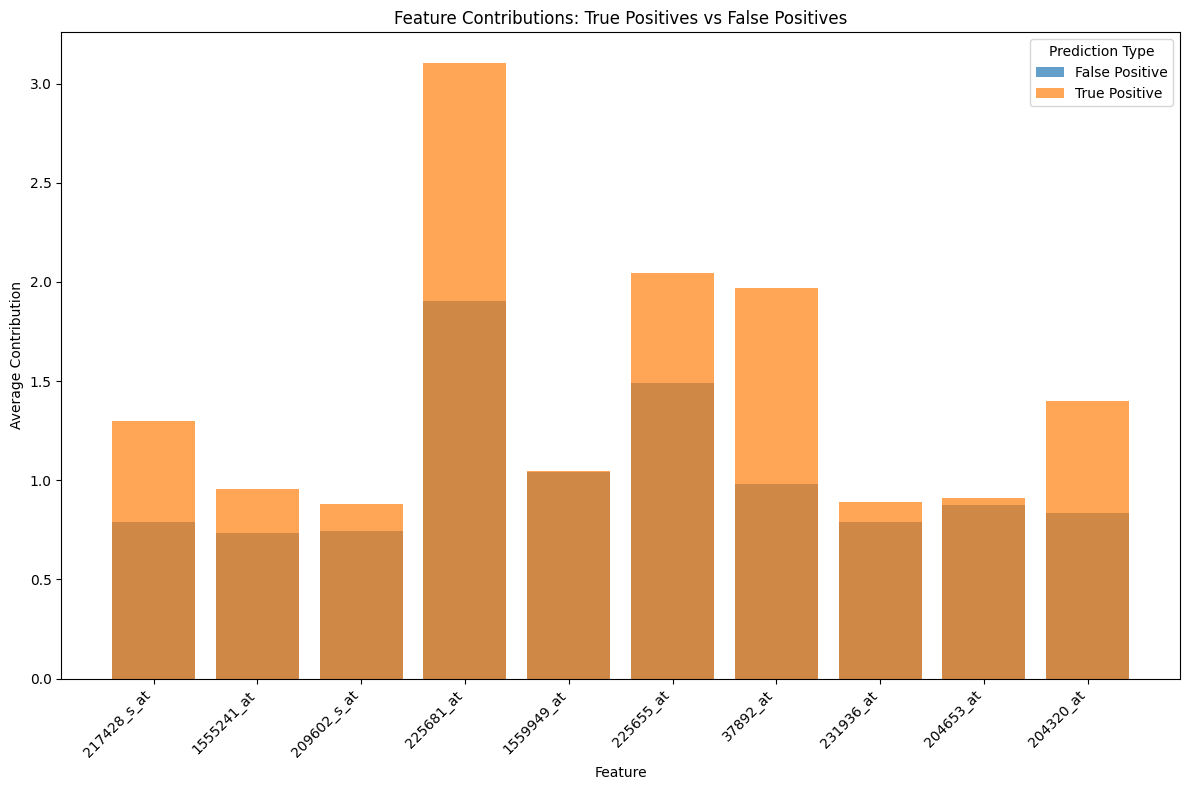

In [16]:
# Visualize the difference between gene pattern of TP and FP

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for the test dataset
y_pred = pipeline.predict(X_test)  # Predicted class (0 or 1)
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]  # Probability for class 1

# Extract coefficients and feature names
coefficients = pipeline.named_steps['classifier'].coef_[0]
feature_names = X.columns

# Identify TP and FP indices
TP_indices = np.where((y_test == 1) & (y_pred == 1))[0]  # True Positives
FP_indices = np.where((y_test == 0) & (y_pred == 1))[0]  # False Positives

# Function to calculate mean contributions
def calculate_mean_contributions(indices, X, coefficients, feature_names):
    contributions_list = []
    for i in indices:
        sample_features = X.iloc[i, :]  # Feature values for the sample
        contributions = sample_features.values * coefficients  # Feature contributions
        contributions_list.append(contributions)
    contributions_array = np.array(contributions_list)
    mean_contributions = contributions_array.mean(axis=0)  # Average contributions
    return pd.DataFrame({'Feature': feature_names, 'Contribution': mean_contributions})

# Calculate average contributions for TP and FP
TP_contributions = calculate_mean_contributions(TP_indices, X_test, coefficients, feature_names)
FP_contributions = calculate_mean_contributions(FP_indices, X_test, coefficients, feature_names)

# Combine data for plotting
TP_contributions['Type'] = 'True Positive'
FP_contributions['Type'] = 'False Positive'
combined_contributions = pd.concat([TP_contributions, FP_contributions])

# Select top features by absolute contribution
top_features = combined_contributions.groupby('Feature')['Contribution'].apply(lambda x: x.abs().mean()).nlargest(10).index
plot_data = combined_contributions[combined_contributions['Feature'].isin(top_features)]

# Plot
plt.figure(figsize=(12, 8))
for label, group in plot_data.groupby('Type'):
    plt.bar(group['Feature'], group['Contribution'], label=label, alpha=0.7)

plt.title("Feature Contributions: True Positives vs False Positives")
plt.ylabel("Average Contribution")
plt.xlabel("Feature")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Prediction Type")
plt.tight_layout()
plt.show()


In [17]:
# Save model

import joblib
joblib.dump(pipeline, 'breast.joblib')

['breast.joblib']